In [1]:
pip install --upgrade seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
water_data=pd.read_csv('water_potability.csv')
water_data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
water_data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [5]:
water_data.shape

(3276, 10)

In [6]:
water_data.dtypes


ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [7]:
water_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [8]:
water_data.describe()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [9]:
water_data.duplicated().any()

False

In [10]:
water_data.isnull().sum()


ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [11]:
null_df=water_data.isnull().sum().reset_index()
null_df.columns=['Column','Null_count']
null_df['%miss_value']=round(null_df['Null_count']/len(water_data),2)*100
null_df

,Column,Null_count,%miss_value
0,ph,491,15.0
1,Hardness,0,0.0
2,Solids,0,0.0
3,Chloramines,0,0.0
4,Sulfate,781,24.0
5,Conductivity,0,0.0
6,Organic_carbon,0,0.0
7,Trihalomethanes,162,5.0
8,Turbidity,0,0.0
9,Potability,0,0.0


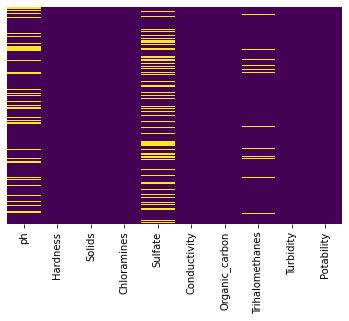

In [12]:
sns.heatmap(water_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

<AxesSubplot:ylabel='Frequency'>

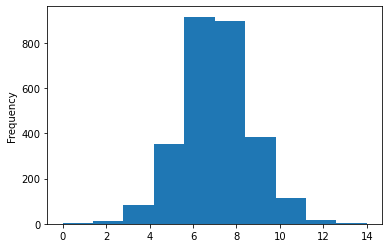

In [13]:
water_data['ph'].plot(kind='hist')

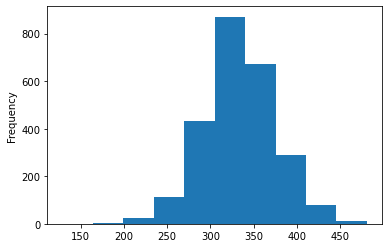

In [14]:
water_data['Sulfate'].plot(kind='hist')
plt.show()

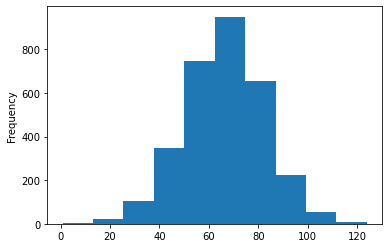

In [15]:
water_data['Trihalomethanes'].plot(kind='hist')
plt.show()

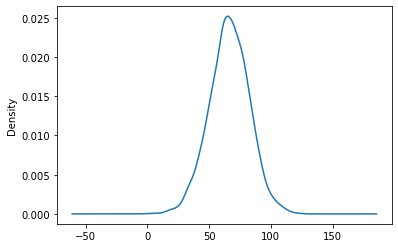

In [16]:
fig=plt.figure()
ax=fig.add_subplot(111)
water_data['Trihalomethanes'].plot(kind='kde',ax=ax)
plt.show()

In [17]:
water_data['ph']=water_data['ph'].fillna(water_data['ph'].mean())
water_data['Trihalomethanes']=water_data['Trihalomethanes'].fillna(water_data['Trihalomethanes'].mean())
water_data['Sulfate']=water_data['Sulfate'].fillna(water_data['Sulfate'].mean())


In [18]:
water_data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [19]:
corr_matrix=water_data.corr()
corr_matrix

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075833,-0.081884,-0.031811,0.014403,0.017192,0.040061,0.002994,-0.036222,-0.003287
Hardness,0.075833,1.000000,-0.046899,-0.030054,-0.092766,-0.023915,0.003610,-0.012690,-0.014449,-0.013837
Solids,-0.081884,-0.046899,1.000000,-0.070148,-0.149840,0.013831,0.010242,-0.008875,0.019546,0.033743
Chloramines,-0.031811,-0.030054,-0.070148,1.000000,0.023791,-0.020486,-0.012653,0.016627,0.002363,0.023779
Sulfate,0.014403,-0.092766,-0.149840,0.023791,1.000000,-0.014059,0.026909,-0.025605,-0.009790,-0.020619
Conductivity,0.017192,-0.023915,0.013831,-0.020486,-0.014059,1.000000,0.020966,0.001255,0.005798,-0.008128
Organic_carbon,0.040061,0.003610,0.010242,-0.012653,0.026909,0.020966,1.000000,-0.012976,-0.027308,-0.030001
Trihalomethanes,0.002994,-0.012690,-0.008875,0.016627,-0.025605,0.001255,-0.012976,1.000000,-0.021502,0.006960
Turbidity,-0.036222,-0.014449,0.019546,0.002363,-0.009790,0.005798,-0.027308,-0.021502,1.000000,0.001581
Potability,-0.003287,-0.013837,0.033743,0.023779,-0.020619,-0.008128,-0.030001,0.006960,0.001581,1.000000


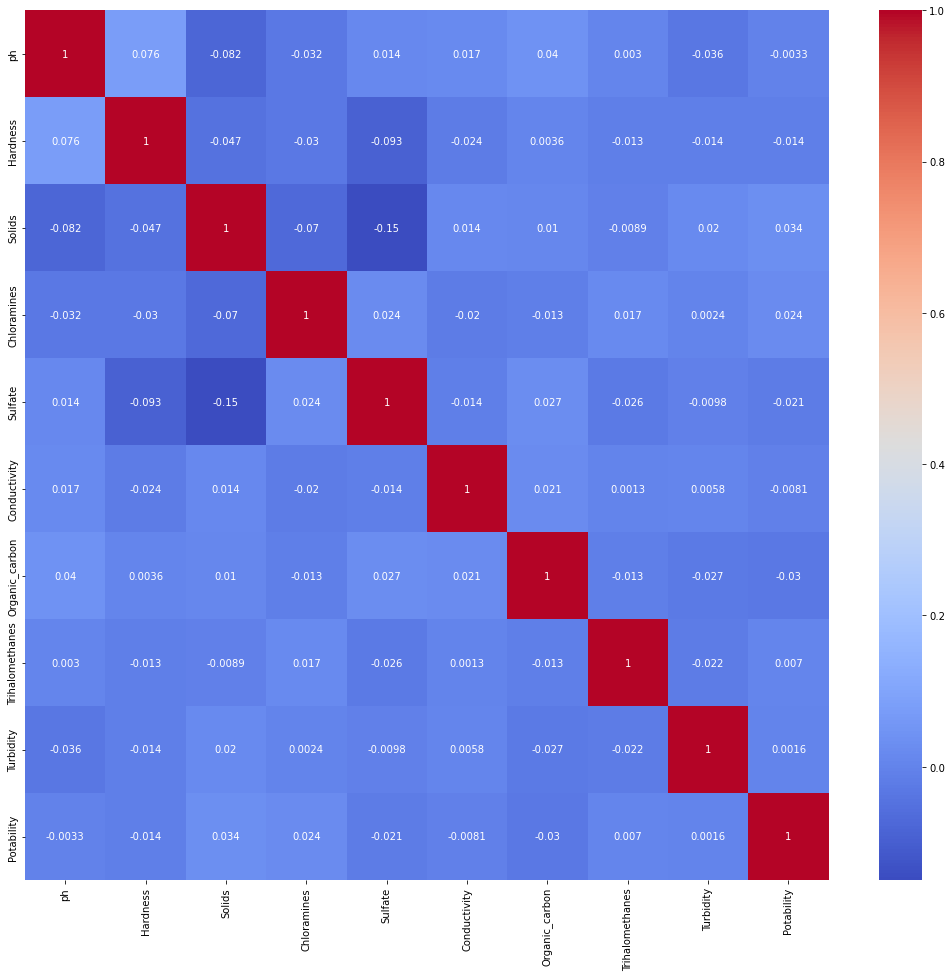

In [20]:
plt.figure(figsize=(18,16))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.show()

In [21]:
corr_matrix1=corr_matrix.abs()
upper_tri=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool_))
upper_tri

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,NaN,0.075833,-0.081884,-0.031811,0.014403,0.017192,0.040061,0.002994,-0.036222,-0.003287
Hardness,NaN,NaN,-0.046899,-0.030054,-0.092766,-0.023915,0.003610,-0.012690,-0.014449,-0.013837
Solids,NaN,NaN,NaN,-0.070148,-0.149840,0.013831,0.010242,-0.008875,0.019546,0.033743
Chloramines,NaN,NaN,NaN,NaN,0.023791,-0.020486,-0.012653,0.016627,0.002363,0.023779
Sulfate,NaN,NaN,NaN,NaN,NaN,-0.014059,0.026909,-0.025605,-0.009790,-0.020619
Conductivity,NaN,NaN,NaN,NaN,NaN,NaN,0.020966,0.001255,0.005798,-0.008128
Organic_carbon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.012976,-0.027308,-0.030001
Trihalomethanes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.021502,0.006960
Turbidity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001581
Potability,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

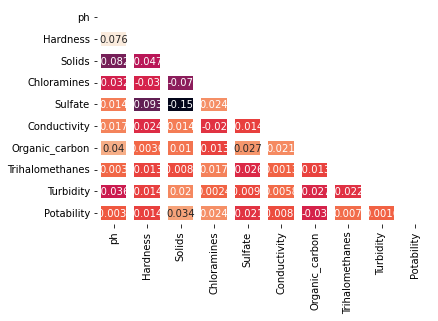

In [22]:
matrix=np.triu(corr_matrix)
sns.heatmap(water_data.corr(),annot=True,linewidth=8, mask=matrix, cmap="rocket",cbar=False)


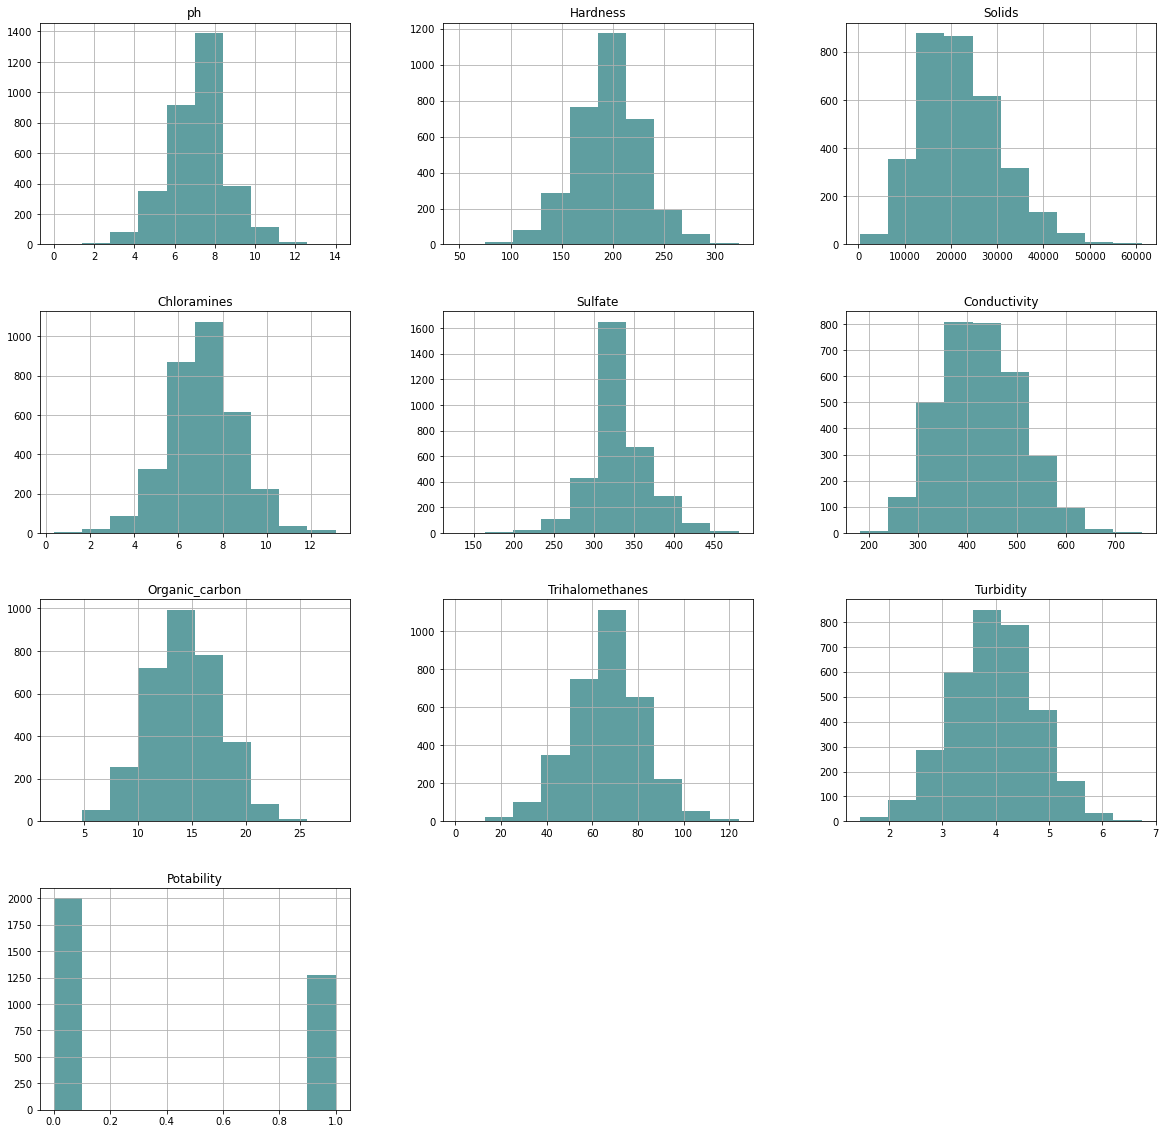

In [23]:
data_hist_plot=water_data.hist(figsize=(20,20),color="#5F9EA0")

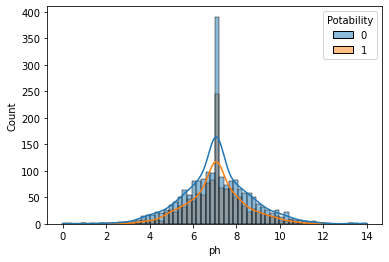

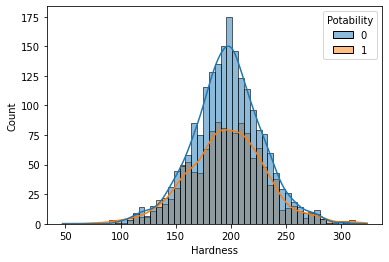

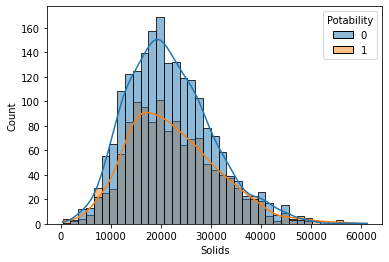

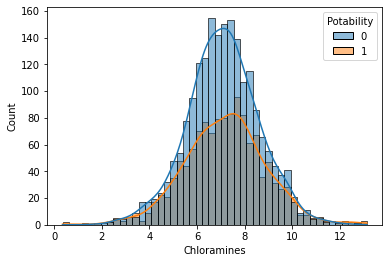

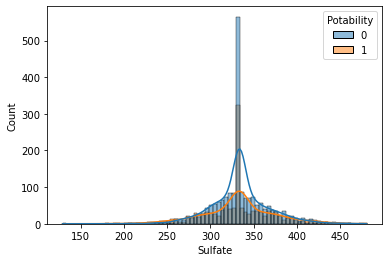

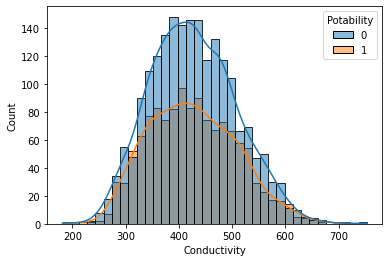

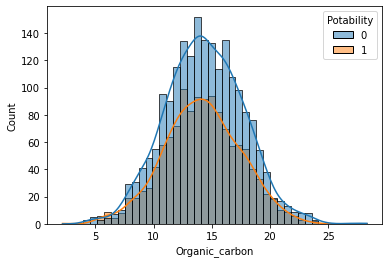

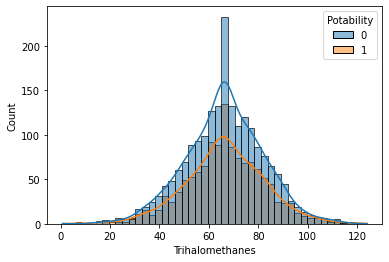

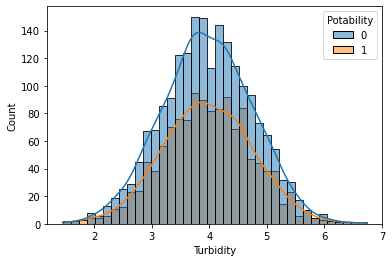

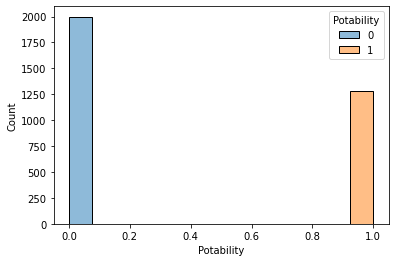

In [24]:
for col in water_data.columns:
    sns.histplot(data=water_data,x=col,kde=True,hue='Potability')
    plt.show()

In [25]:
water_data.groupby('Potability').mean().T

Potability,0,1
ph,7.084658,7.074754
Hardness,196.733292,195.800744
Solids,21777.490788,22383.991018
Chloramines,7.092175,7.169338
Sulfate,334.371700,332.844122
Conductivity,426.730454,425.383800
Organic_carbon,14.364335,14.160893
Trihalomethanes,66.308522,66.533513
Turbidity,3.965800,3.968328


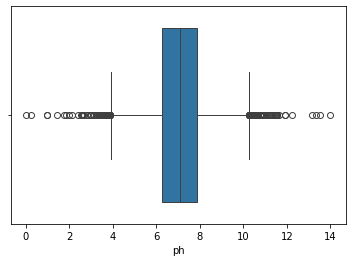

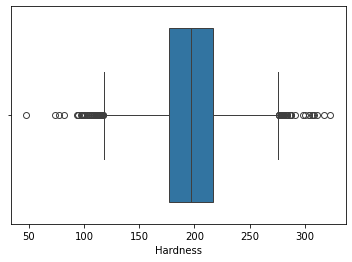

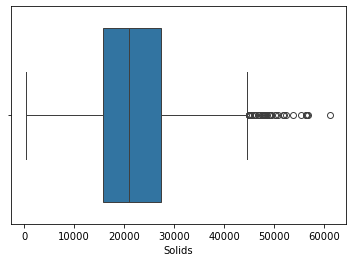

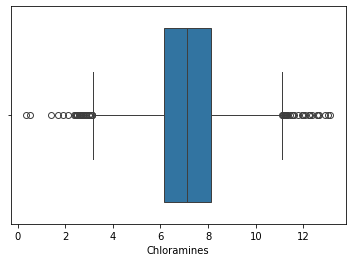

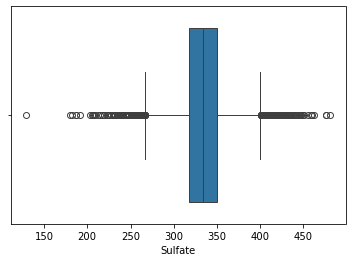

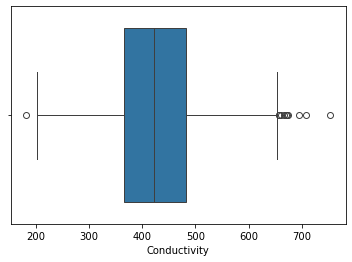

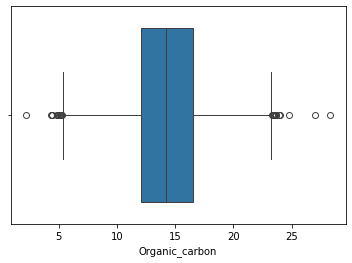

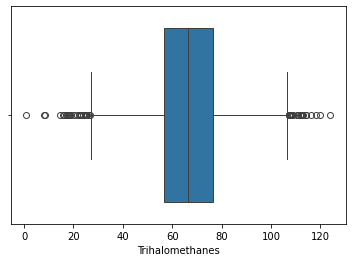

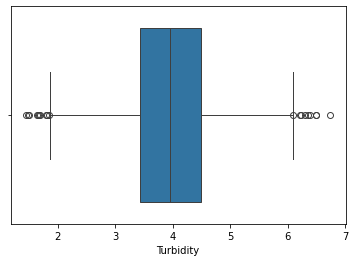

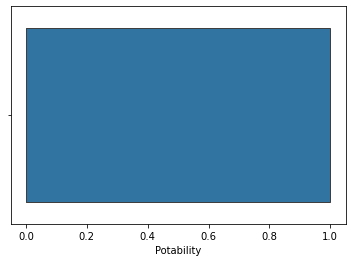

In [26]:
for col in water_data.columns:
    sns.boxplot(data=water_data,x=col)
    plt.show()

<AxesSubplot:>

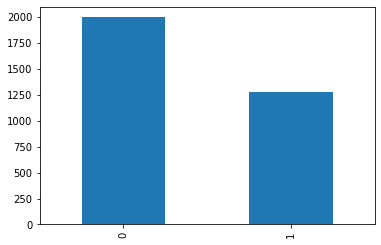

In [27]:
#sns.countplot(water_data['Potability'])
water_data['Potability'].value_counts().plot(kind='bar')

In [28]:
x=water_data.drop('Potability',axis=1)
y=water_data['Potability']

In [29]:
x.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [30]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Potability, dtype: int64

In [31]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()

In [32]:
X_scaled=std_scaler.fit_transform(x)
X_scaled

array([[-1.02733269e-14,  2.59194711e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30614943e+00, -1.28629758e+00],
       [-2.28933938e+00, -2.03641367e+00, -3.85986650e-01, ...,
         2.70597240e-01, -6.38479983e-01,  6.84217891e-01],
       [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116857e-01,  1.50940884e-03, -1.16736546e+00],
       ...,
       [ 1.59125368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329234e-01,  2.18748247e-01, -8.56006782e-01],
       [-1.32951593e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.03468419e-01,  9.50797383e-01],
       [ 5.40150905e-01, -3.85462310e-02, -5.25811937e-01, ...,
         5.60940070e-01,  7.80223466e-01, -2.12445866e+00]])

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test=train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [34]:
x_train.shape, x_test.shape

((2620, 9), (656, 9))

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

In [36]:
LR = LogisticRegression()
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()
ETC = ExtraTreesClassifier()
SVM = SVC()
KNN = KNeighborsClassifier()
GBC = GradientBoostingClassifier()
ABC = AdaBoostClassifier()
NB = GaussianNB()

In [37]:
from sklearn.model_selection import cross_val_score

In [38]:
models = [LR,DT,RF,ETC,SVM,KNN,GBC,ABC,NB]
features = X_scaled
labels = y
CV = 5
accu_list = [] #Accuracy List
ModelName = [] #Model Name List
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model,features,labels,scoring = 'accuracy',cv= CV)
    accu_list.append(accuracies.mean()*100)
    ModelName.append(model_name)

model_acc_df = pd.DataFrame({"Model": ModelName, "Cross_Val_Accuracy" : accu_list})
model_acc_df

,Model,Cross_Val_Accuracy
0,LogisticRegression,61.019549
1,DecisionTreeClassifier,57.662586
2,RandomForestClassifier,63.309858
3,ExtraTreesClassifier,63.431577
4,SVC,65.080339
5,KNeighborsClassifier,59.340579
6,GradientBoostingClassifier,61.753072
7,AdaBoostClassifier,59.249488
8,GaussianNB,61.263871


In [39]:
from sklearn.metrics import classification_report

In [40]:
SVM.fit(x_train, y_train)
ETC.fit(x_train, y_train)
RF.fit(x_train, y_train)
y_pred_rf = RF.predict(x_test)
y_pred_svm = SVM.predict(x_test)
y_pred_etc = ETC.predict(x_test)

In [41]:
print(classification_report(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_svm))
print(classification_report(y_test,y_pred_etc))

              precision    recall  f1-score   support

           0       0.67      0.88      0.76       400
           1       0.63      0.32      0.42       256

    accuracy                           0.66       656
   macro avg       0.65      0.60      0.59       656
weighted avg       0.65      0.66      0.63       656

              precision    recall  f1-score   support

           0       0.66      0.92      0.77       400
           1       0.69      0.27      0.39       256

    accuracy                           0.67       656
   macro avg       0.68      0.60      0.58       656
weighted avg       0.67      0.67      0.62       656

              precision    recall  f1-score   support

           0       0.66      0.89      0.76       400
           1       0.62      0.27      0.38       256

    accuracy                           0.65       656
   macro avg       0.64      0.58      0.57       656
weighted avg       0.64      0.65      0.61       656



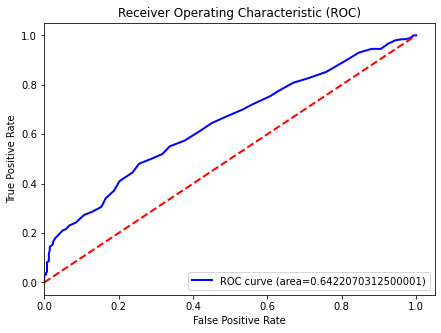

In [42]:
from sklearn.metrics import roc_curve, auc
y_scores = ETC.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr,tpr)

plt.figure(figsize=(7,5))
plt.plot(fpr,tpr,color='blue',lw=2,label=f'ROC curve (area={roc_auc})')
plt.plot([0,1],[0,1],color='red',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.xlim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

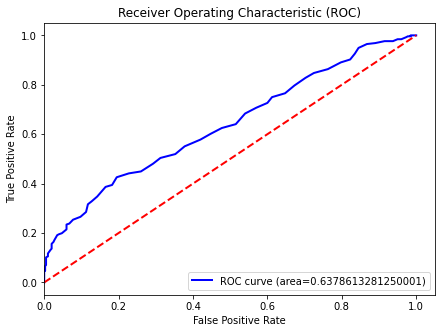

In [43]:
from sklearn.metrics import roc_curve, auc
y_scores = RF.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr,tpr)

plt.figure(figsize=(7,5))
plt.plot(fpr,tpr,color='blue',lw=2,label=f'ROC curve (area={roc_auc})')
plt.plot([0,1],[0,1],color='red',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.xlim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [44]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

params_RF ={"min_samples_split": [2,6],
           "min_samples_leaf":[1,4],
           "n_estimators":[100, 200, 300],
           "criterion":["gini",'entropy']
           }

cv_method = StratifiedKFold(n_splits=3)
GridSearchCV_RF = GridSearchCV(estimator=RandomForestClassifier(),
                              param_grid=params_RF,
                              cv=cv_method,
                              verbose=1,
                              n_jobs=2,
                              scoring="accuracy",
                              return_train_score=True
                              )

GridSearchCV_RF.fit(x_train, y_train)
best_params_RF = GridSearchCV_RF.best_params_
print("Best Hyperparameters for Random Forest are = ",best_params_RF)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Hyperparameters for Random Forest are =  {'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 200}


In [45]:
best_estimator = GridSearchCV_RF.best_estimator_
best_estimator

RandomForestClassifier(min_samples_split=6, n_estimators=200)

In [46]:
best_estimator = GridSearchCV_RF.best_estimator_
best_estimator.fit(x_train,y_train)
y_pred_best = best_estimator.predict(x_test)
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.66      0.89      0.76       400
           1       0.63      0.29      0.40       256

    accuracy                           0.66       656
   macro avg       0.65      0.59      0.58       656
weighted avg       0.65      0.66      0.62       656



In [47]:
from sklearn.metrics import accuracy_score
print(f"Accuracy of Random Forest Model = {round(accuracy_score(y_test, y_pred_best)*100,2)}%")

Accuracy of Random Forest Model = 65.7%


In [48]:
water_data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [49]:
list1 = water_data.iloc[2:3,0:9].values.flatten().tolist()
list1

[8.099124189298397,
 224.23625939355776,
 19909.541732292397,
 9.275883602694089,
 333.7757766108134,
 418.6062130644815,
 16.868636929550973,
 66.42009251176368,
 3.0559337496641685]

In [50]:
ph = float(input('Enter the ph Value = '))
Hardness = float(input('Enter the Hardness Value = '))
Solids = float(input('Enter the Solids Value = '))
Chloramines = float(input('Enter the Chloramines Value = '))
Sulfate = float(input('Enter the Sulfate Value = '))
Conductivity = float(input('Enter the Conductivity Value = '))
Organic_carbon = float(input('Enter the Organic_carbon Value = '))
Trihalomethanes = float(input('Enter the Trihalomethanes Value = '))
Turbidity = float(input('Enter the Turbidity Value = '))


Enter the ph Value = 7
Enter the Hardness Value = 240
Enter the Solids Value = 14245
Enter the Chloramines Value = 6.5
Enter the Sulfate Value = 400
Enter the Conductivity Value = 416
Enter the Organic_carbon Value = 12
Enter the Trihalomethanes Value = 90
Enter the Turbidity Value = 3


In [51]:
input_data = [ph, Hardness, Solids, Chloramines, Sulfate, Conductivity, Organic_carbon,
            Trihalomethanes, Turbidity]

In [52]:
water_data_input = std_scaler.transform([[ph, Hardness, Solids, Chloramines, Sulfate, Conductivity, 
                                         Organic_carbon, Trihalomethanes, Turbidity]])
water_data_input

array([[-0.05497228,  1.327174  , -0.88615109, -0.39313861,  1.8325829 ,
        -0.12628255, -0.69081232,  1.4969872 , -1.2390512 ]])

In [53]:
model_prediction = best_estimator.predict(water_data_input)
model_prediction

array([1], dtype=int64)

In [54]:
if model_prediction[0]==0:
    print("Water is Not SAFE for Consumption")
else:
    print("Water is SAFE for Consumption")

Water is SAFE for Consumption


In [55]:
def Water_Quality_Prediction(input_data):
    scaled_data = std_scaler.transform([input_data])
    model_prediction = best_estimator.predict(scaled_data)
    if model_prediction[0]==0:
        return "Water is 'NOT SAFE' for Consumption"
    else:
        return "Water is 'SAFE' for Consumption"

In [ ]:
ph = float(input('Enter the ph Value = '))
Hardness = float(input('Enter the Hardness Value = '))
Solids = float(input('Enter the Solids Value = '))
Chloramines = float(input('Enter the Chloramines Value = '))
Sulfate = float(input('Enter the Sulfate Value = '))
Conductivity = float(input('Enter the Conductivity Value = '))
Organic_carbon = float(input('Enter the Organic_carbon Value = '))
Trihalomethanes = float(input('Enter the Trihalomethanes Value = '))
Turbidity = float(input('Enter the Turbidity Value = '))

input_data = [ph, Hardness, Solids, Chloramines, Sulfate, Conductivity, Organic_carbon,
            Trihalomethanes, Turbidity]

Water_Quality_Prediction(input_data)

In [ ]:
import pickle

In [ ]:
filename = 'water_Quality_ML_Trained_Model.sav'
pickle.dump(best_estimator, open(filename, 'wb'))

In [ ]:
water_quality_model = pickle.load(open('water_Quality_ML_Trained_Model.sav','rb'))

In [ ]:
data = [7.65, 236.96, 14245.78, 6.28, 373.16, 416.5, 10.46, 85.85, 2.43]
scaled_data1 = std_scaler.transform([data])
water_quality_model.predict(scaled_data1)